### 강아지 고양이 분류 - CNN

In [1]:
# ref: https://www.kaggle.com/c/dogs-vs-cats/data

### library import

In [20]:
import sys 
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, load_img

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# seed 고정
np.random.seed(121)
tf.random.set_seed(121)

In [6]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

### Preparing train data

In [11]:
filenames = os.listdir("./dogs-vs-cats/train")
categories = []

for filename in filenames:
    category = filename.split(".")[0]
    if category == 'cat':
        categories.append(0)
    else:
        categories.append(1)
        
df = pd.DataFrame({
    'filename':filenames,
    'category':categories
    })

In [13]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


<AxesSubplot:>

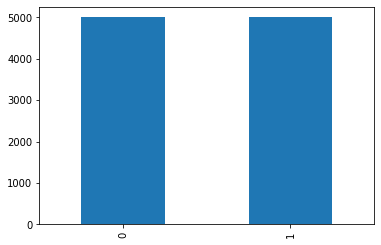

In [14]:
df['category'].value_counts().plot.bar()

### See sample image

In [18]:
sample = random.choice(filenames)

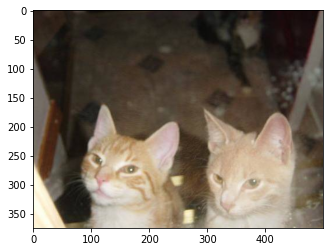

In [21]:
image = load_img("./dogs-vs-cats/train/"+sample)
plt.imshow(image)

### Build model

In [23]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)      

### Callbacks

ReduceLROnPlateau
모델의 개선이 없을 경우, Learning Rate를 조절해 모델의 개선을 유도하는 콜백함수

In [26]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [27]:
earlystop = EarlyStopping(patience=10)

In [30]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [31]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
# https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification